# Contour Plots, 3D Plots, Optimisation

We will study contour plots and 3D plots for functions of two variables. We will also look at simple examples of unconstrained and constrained optimisation of functions of two variables.

## Import

The imports here more than what we have seen so far.

In [ ]:
import numpy as np
# For 3d plots
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
# For optimisation
from scipy.optimize import minimize, LinearConstraint
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 15

# Contour Plots, 3D Plots, Optimisation

We will look at plotting contours of surfaces, surface plots and optimising functions of two variables.

## Contour

Draw contours of the function:

$$
f(x, y) = x^2 + y^2
$$

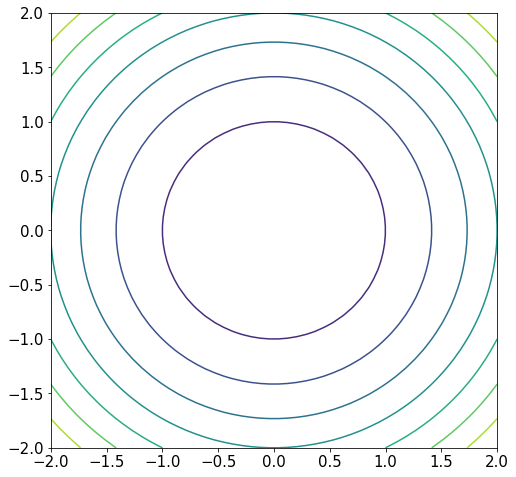

In [ ]:
def f(x, y):
    return x ** 2 + y ** 2
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(x, y, Z);

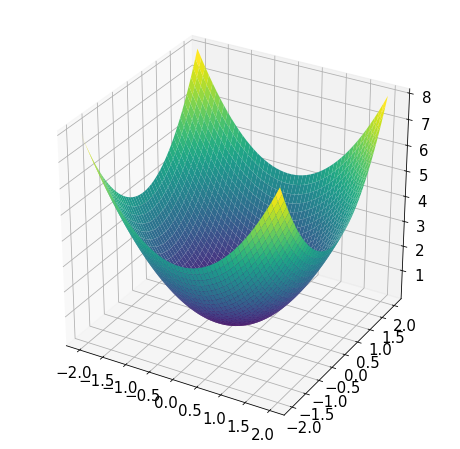

In [ ]:
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis');

## 3D surface plot

Plot the following surface:

$$
f(x, y) = \exp \left[ \cfrac{-(x + 2)^2 - (y - 1)^2}{6} \right]
$$

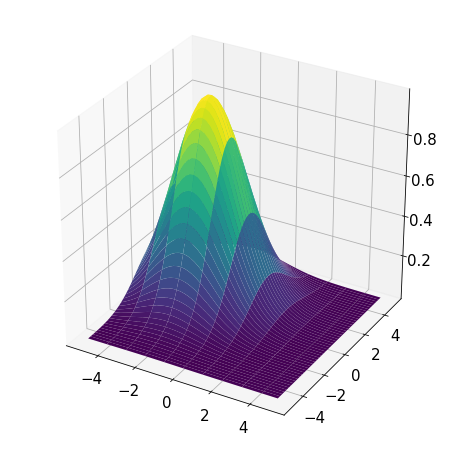

In [ ]:
def f(x, y):
    return np.exp((-(x + 2) ** 2 - (y - 1) ** 2) / 6)

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis', rstride = 1, cstride = 5);

## Unconstrained Optimisation

Let us now try to find the maximum value of the above function. This is a simple, unconstrained optimisation problem. We will use `SciPy`'s optimisation routine for this.

$$
\max \limits_{x, y} \quad  \exp \left[ \cfrac{-(x + 2)^2 - (y - 1)^2}{6} \right]
$$

In [ ]:
from scipy.optimize import minimize
def f(x):
    # x <- [x, y]
    return -np.exp((-(x[0] + 2) ** 2 - (x[1] - 1) ** 2) / 6)

x0 = np.array([0, 0])
res = minimize(f, x0)
res.x

array([-1.99999576,  0.99999789])

## Constraind Optimisation

Let us move to the slightly more complex setup of a constraind optimisation problem.

$$
\max \limits_{x, y} \quad 1 - x^2 - y^2
$$

subject to:

$$
x + y \geq 1
$$

Rewrite constraint as:

$$
lb \leq A . x \leq ub
$$

$$
1 \leq [1, 1] . [x, y] \leq \infty
$$

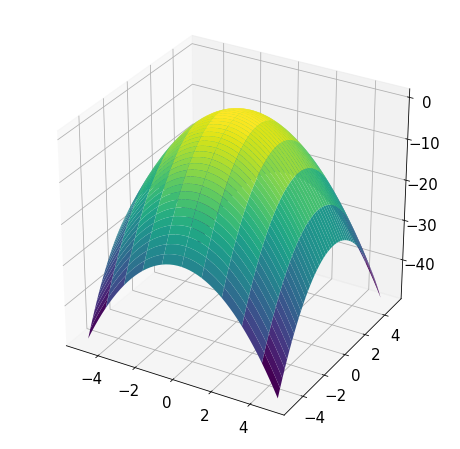

In [ ]:
def f(x, y):
    return 1 - x ** 2 - y ** 2

x = np.linspace(-5, 5)
y = np.linspace(-5, 5)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, Z, cmap = 'viridis', rstride = 1, cstride = 5);

In [ ]:
from scipy.optimize import minimize, LinearConstraint

def f(x):
    # x <- [x, y]
    return -(1 - x[0] ** 2 - x[1] ** 2)

# lb <= A x <= ub
linear_const = LinearConstraint(np.array([1, 1]), 1, np.inf)
x0 = np.array([0, 0])
res = minimize(f, x0, constraints = linear_const)
res.x # argmax f(x, y)
res

     fun: -0.4999999999999998
     jac: array([1.00000001, 1.00000001])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.5, 0.5])

### Verify

Plot the contours of the objective function along with the constraints. Verify the correctness of the solution obtaind.

(-1.0, 1.0)

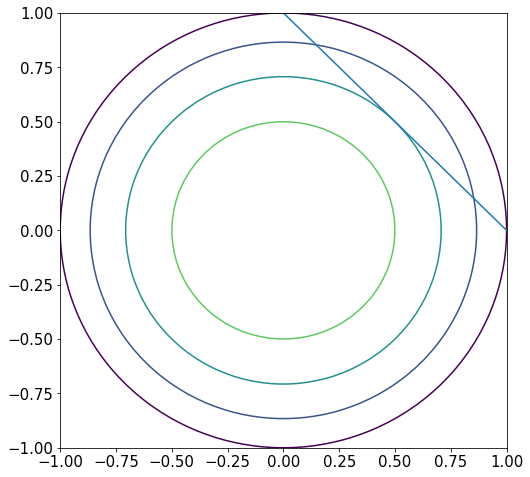

In [ ]:
def f(x, y):
    return 1 - x ** 2 - y ** 2

x = np.linspace(-1, 1)
y = np.linspace(-1, 1)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(x, y, Z, levels = [0, 0.25, 0.5, 0.75, 1])
plt.plot(x, 1 - x)
plt.xlim([-1, 1])
plt.ylim([-1, 1])